### 1. Read the data as an appropriate Time Series data and plot the data.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Rose.csv')
data.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [5]:
data.isna().sum().sum()

2

In [6]:
data['Rose'].fillna(data['Rose'].median(), inplace = True)  


In [7]:
data.isna().sum().sum()

0

In [8]:
date = pd.date_range(start='1980/1/1', end='1995/8/1', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [9]:
data['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
data.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [10]:
data['Time_Stamp'] = pd.to_datetime(data['Time_Stamp'])


In [11]:
data = data.set_index('Time_Stamp')
data.drop(['YearMonth'], axis=1, inplace=True)
data.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [12]:
data['Rose'] = data['Rose'].astype(int)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rose    187 non-null    int32
dtypes: int32(1)
memory usage: 2.2 KB


## Plotting the Time Series to understand the behaviour of the data

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

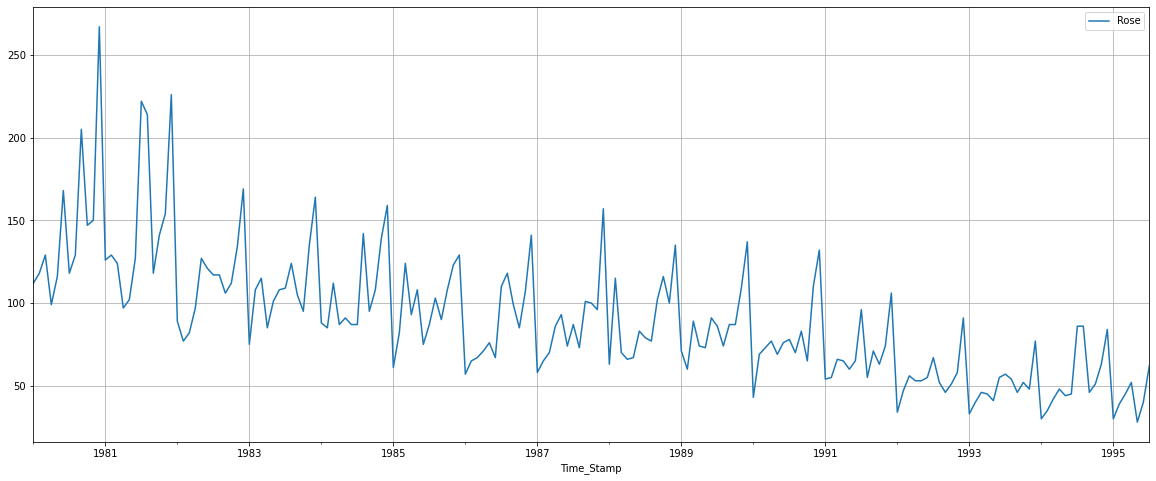

In [15]:
data.plot(figsize=(20,8))
plt.grid();

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.


In [16]:
data.describe()

,Rose
count,187.000000
mean,90.347594
std,38.966791
min,28.000000
25%,63.000000
50%,86.000000
75%,111.000000
max,267.000000


In [41]:
data.dropna(inplace = True)

In [42]:
data.isna().sum()

Rose    0
dtype: int64

##### Plot a boxplot to understand the spread of sales across different years and within different months across years.

##### yearly boxplot

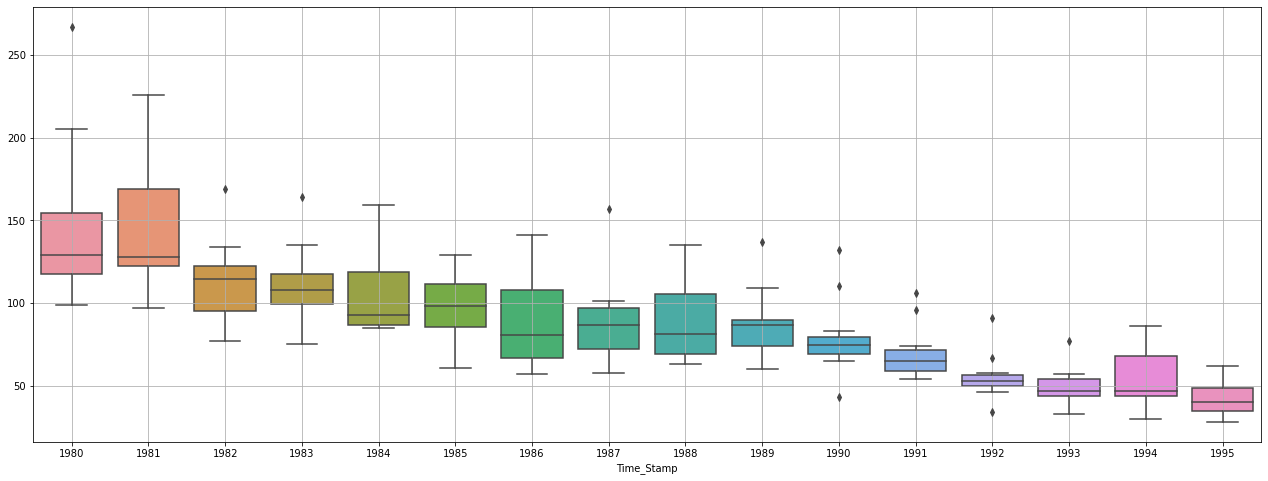

In [17]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = data.index.year,y = data.values[:,0],ax=ax)
plt.grid();

##### Monthly Boxplot

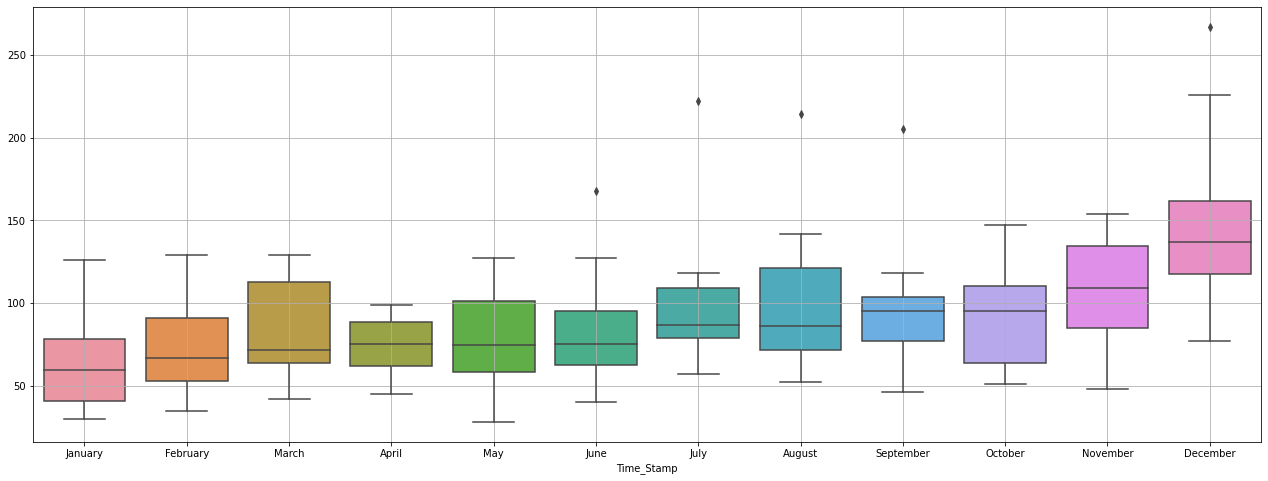

In [18]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = data.index.month_name(),y = data.values[:,0],ax=ax)
plt.grid();

#### Plot a graph of monthly sales across years.

In [19]:
monthly_sales_across_years = pd.pivot_table(data, values = 'Rose', columns = data.index.month_name(), index = data.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,99.0,129.0,267.0,118.0,112.0,118.0,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.0,226.0,129.0,126.0,222.0,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.0,169.0,77.0,89.0,117.0,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.0,164.0,108.0,75.0,109.0,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.0,159.0,85.0,88.0,87.0,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.0,129.0,82.0,61.0,87.0,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.0,141.0,65.0,57.0,110.0,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.0,157.0,65.0,58.0,87.0,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.0,135.0,115.0,63.0,79.0,83.0,70.0,67.0,100.0,116.0,102.0


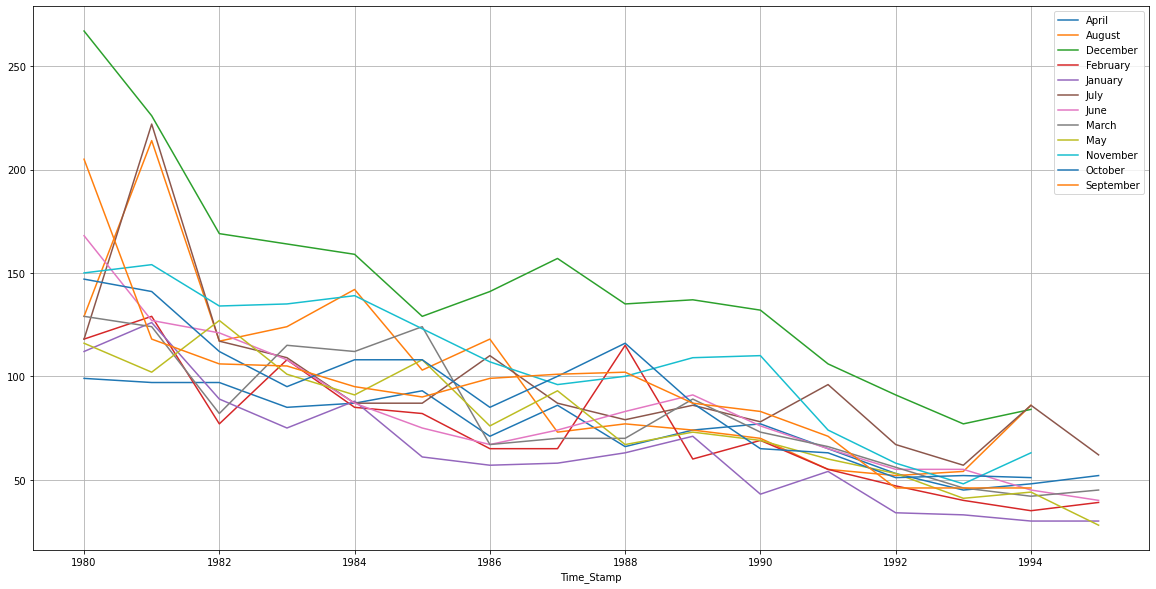

In [20]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

##### Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.¶

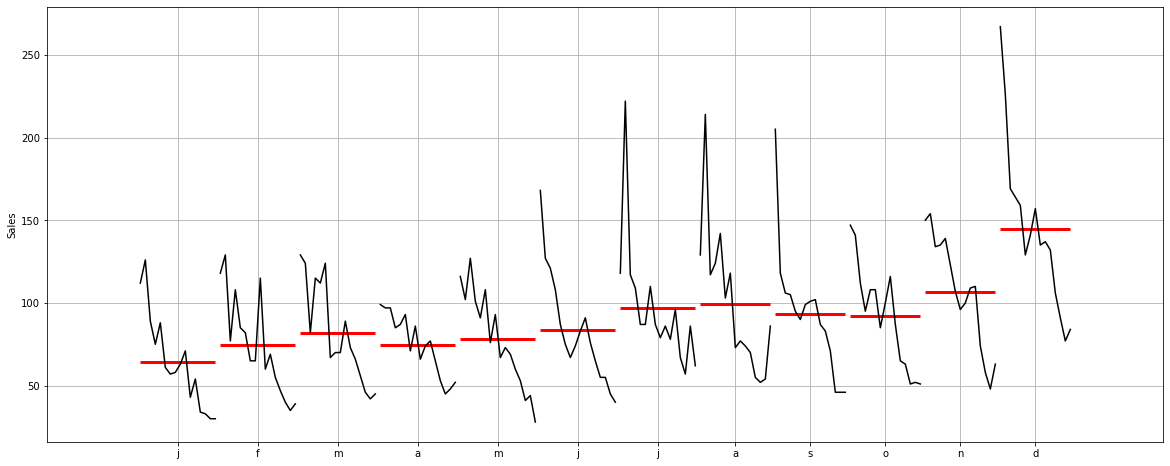

In [21]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(data['Rose'],ylabel='Sales')
plt.grid();

#### Plot the Empirical Cumulative Distribution.

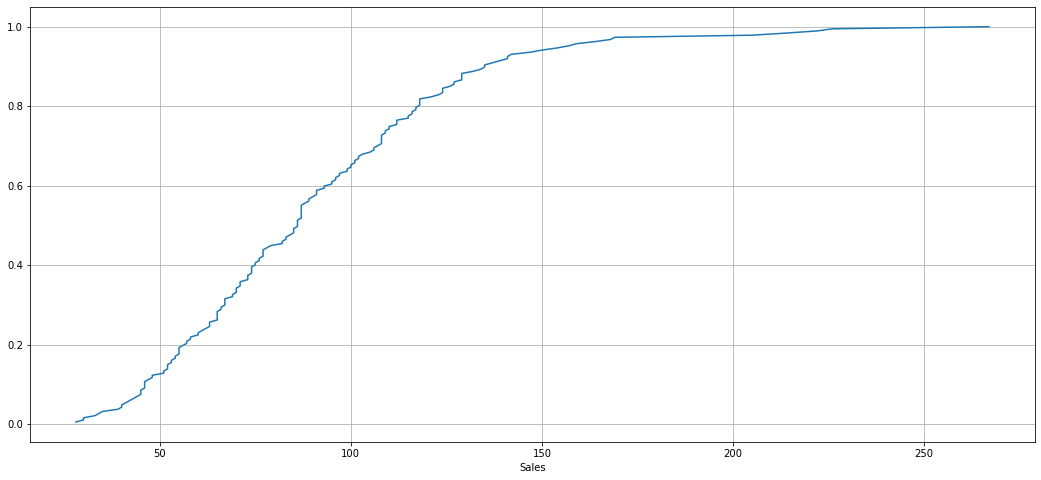

In [22]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(data['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

#### Plot the average Rose_Sales per month and the month on month percentage change of Rose_Sales.

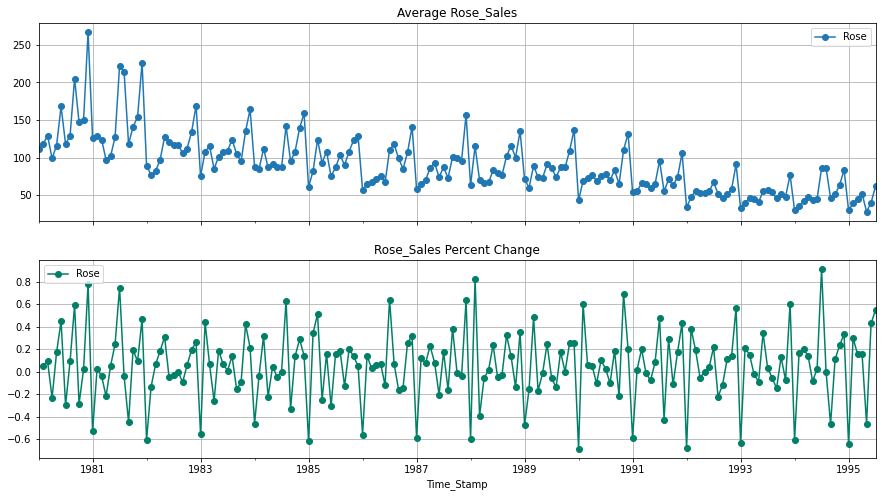

In [23]:
# group by date and get average Rose_Sales, and precent change

average    = data.groupby(data.index)["Rose"].mean()
pct_change = data.groupby(data.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Rose_Sales over time(year-month)

ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose_Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

# plot precent change for Rose_Sales over time(year-month)

ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose_Sales Percent Change",grid=True)

##### Decompose the Time Series and plot the different components.

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
# Additive Decomposition

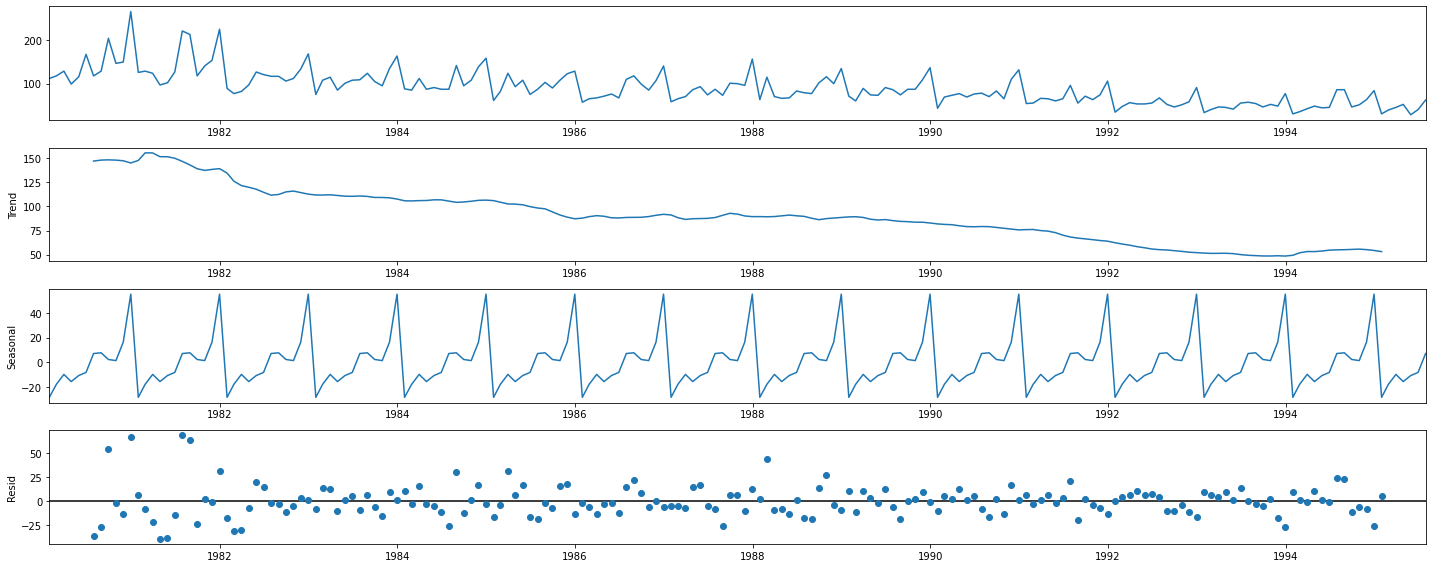

In [25]:
decomposition = seasonal_decompose(data,model='additive')
decomposition.plot();

In [26]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -28.355258
1980-02-29   -17.794345
1980-03-31    -9.764583
1980-04-30   -15.577083
1980-05-31   -10.675298
1980-06-30    -8.157440
1980-07-31     7.161409
1980-08-31     7.741964
1980-09-30     2.328075
1980-10-31     1.425298
1980-11-30    16.400298
1980-12-31    55.266964
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -36.244742
1980-08-31   -26.866964
1980-09-30    54.296925
1980-10-31    -2.508631
1980-11-30   -13.816964
1980-12-31    66.60

In [27]:
### Multiplicative Decomposition

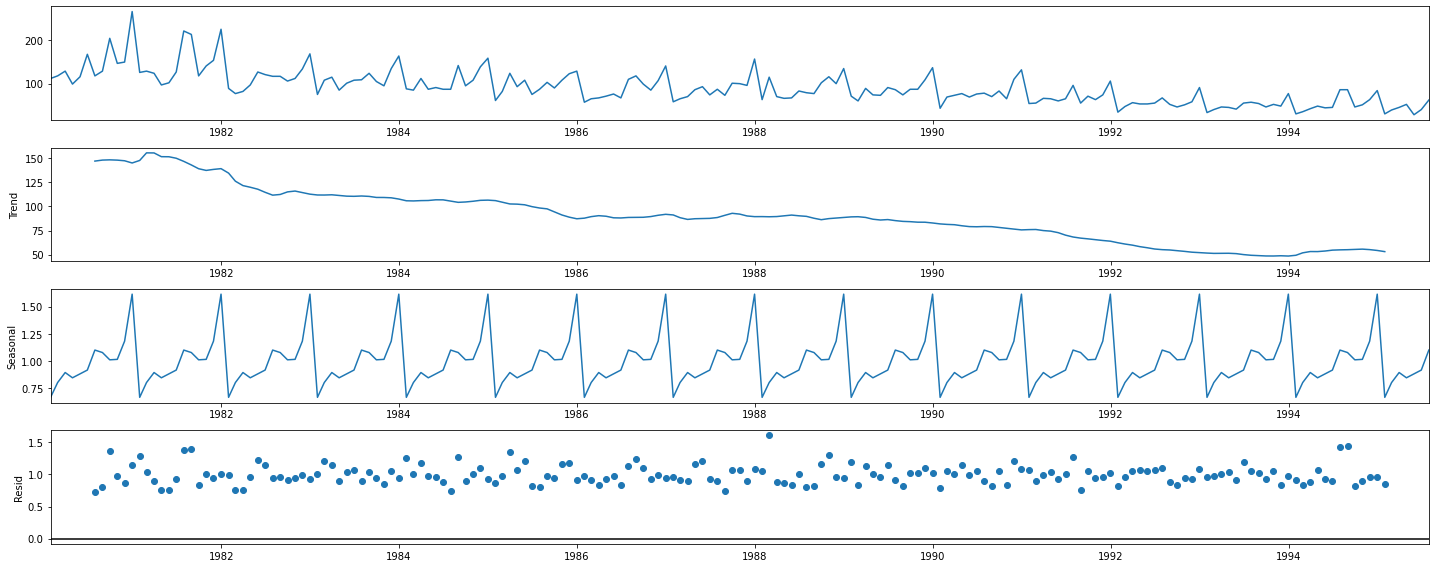

In [28]:
decomposition = seasonal_decompose(data,model='multiplicative')
decomposition.plot();

In [29]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.664904
1980-02-29    0.801176
1980-03-31    0.893234
1980-04-30    0.844896
1980-05-31    0.881276
1980-06-30    0.915970
1980-07-31    1.099977
1980-08-31    1.077255
1980-09-30    1.010266
1980-10-31    1.014454
1980-11-30    1.182097
1980-12-31    1.614497
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.729348
1980-08-31    0.808431
1980-09-30    1.367594
1980-10-31    0.978541
1980-11-30    0.860779
1980-12-31    1.139546
Name: resid, dtype:

### 3. Split the data into training and test. The test data should start in 1991.

In [30]:
data.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='Time_Stamp')

In [31]:
train = data[data.index<='1991'] 
test = data[data.index>'1991']

In [32]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [33]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-31,112
1980-02-29,118
1980-03-31,129
1980-04-30,99
1980-05-31,116


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-31,70
1990-09-30,83
1990-10-31,65
1990-11-30,110
1990-12-31,132


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-31,54
1991-02-28,55
1991-03-31,66
1991-04-30,65
1991-05-31,60


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-31,45
1995-04-30,52
1995-05-31,28
1995-06-30,40
1995-07-31,62


In [34]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [35]:
# Printing the Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,Rose
Time_Stamp,
1980-01-31,112
1980-02-29,118
1980-03-31,129
1980-04-30,99
1980-05-31,116
...,...
1990-08-31,70
1990-09-30,83
1990-10-31,65


Test Data


,Rose
Time_Stamp,
1991-01-31,54
1991-02-28,55
1991-03-31,66
1991-04-30,65
1991-05-31,60
1991-06-30,65
1991-07-31,96
1991-08-31,55
1991-09-30,71


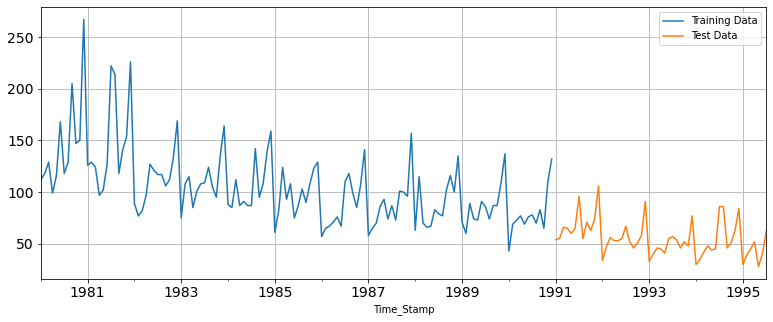

In [36]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE. Please do try to build as many models as possible and as many iterations of models as possible with different parameters.


In [37]:
import statsmodels.tools.eval_measures as em
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from IPython.display import display
from pylab import rcParams

In [38]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [39]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [40]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.09874933517484011,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38703609891138,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [41]:
# Using the fitted model on the training set to forecast on the test set

SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-31    87.104984
1991-02-28    87.104984
1991-03-31    87.104984
1991-04-30    87.104984
1991-05-31    87.104984
1991-06-30    87.104984
1991-07-31    87.104984
1991-08-31    87.104984
1991-09-30    87.104984
1991-10-31    87.104984
1991-11-30    87.104984
1991-12-31    87.104984
1992-01-31    87.104984
1992-02-29    87.104984
1992-03-31    87.104984
1992-04-30    87.104984
1992-05-31    87.104984
1992-06-30    87.104984
1992-07-31    87.104984
1992-08-31    87.104984
1992-09-30    87.104984
1992-10-31    87.104984
1992-11-30    87.104984
1992-12-31    87.104984
1993-01-31    87.104984
1993-02-28    87.104984
1993-03-31    87.104984
1993-04-30    87.104984
1993-05-31    87.104984
1993-06-30    87.104984
1993-07-31    87.104984
1993-08-31    87.104984
1993-09-30    87.104984
1993-10-31    87.104984
1993-11-30    87.104984
1993-12-31    87.104984
1994-01-31    87.104984
1994-02-28    87.104984
1994-03-31    87.104984
1994-04-30    87.104984
1994-05-31    87.104984
1994-06-30    87

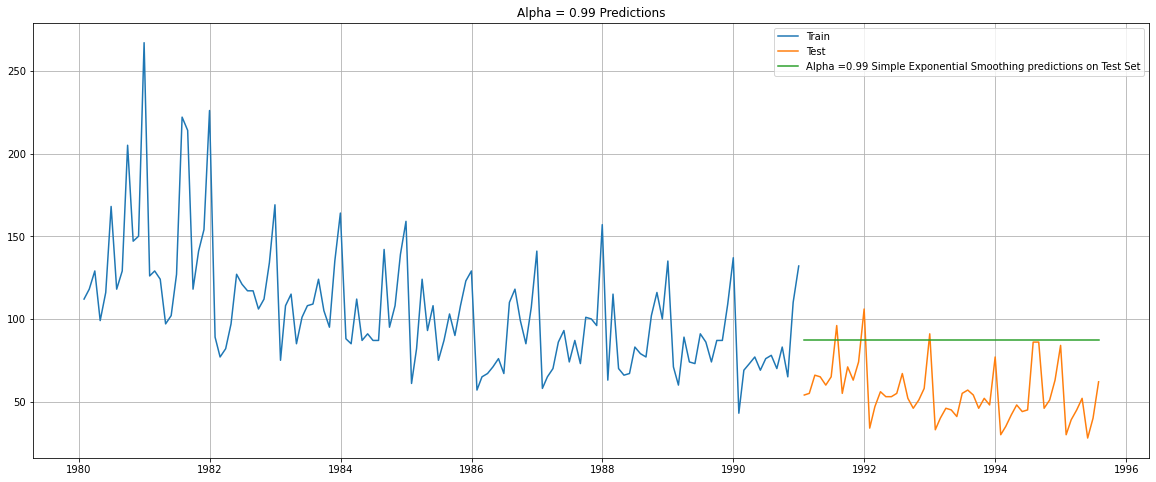

In [42]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [43]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [44]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 35.9313407827147
SES RMSE (calculated using statsmodels): 35.9313407827147


In [45]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",35.931341


In [46]:
### Holt - ETS(A, A, N) - Holt's linear method with additive errors
### Double Exponential Smoothing

In [47]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.9086427682180844e-08, 'smoothing_trend': 7.302464353829351e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81629861505857, 'initial_trend': -0.4943753249082896, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [48]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-31    72.064380
1991-02-28    71.570005
1991-03-31    71.075630
1991-04-30    70.581254
1991-05-31    70.086879
1991-06-30    69.592504
1991-07-31    69.098128
1991-08-31    68.603753
1991-09-30    68.109378
1991-10-31    67.615002
1991-11-30    67.120627
1991-12-31    66.626252
1992-01-31    66.131877
1992-02-29    65.637501
1992-03-31    65.143126
1992-04-30    64.648751
1992-05-31    64.154375
1992-06-30    63.660000
1992-07-31    63.165625
1992-08-31    62.671249
1992-09-30    62.176874
1992-10-31    61.682499
1992-11-30    61.188123
1992-12-31    60.693748
1993-01-31    60.199373
1993-02-28    59.704997
1993-03-31    59.210622
1993-04-30    58.716247
1993-05-31    58.221871
1993-06-30    57.727496
1993-07-31    57.233121
1993-08-31    56.738745
1993-09-30    56.244370
1993-10-31    55.749995
1993-11-30    55.255619
1993-12-31    54.761244
1994-01-31    54.266869
1994-02-28    53.772493
1994-03-31    53.278118
1994-04-30    52.783743
1994-05-31    52.289367
1994-06-30    51

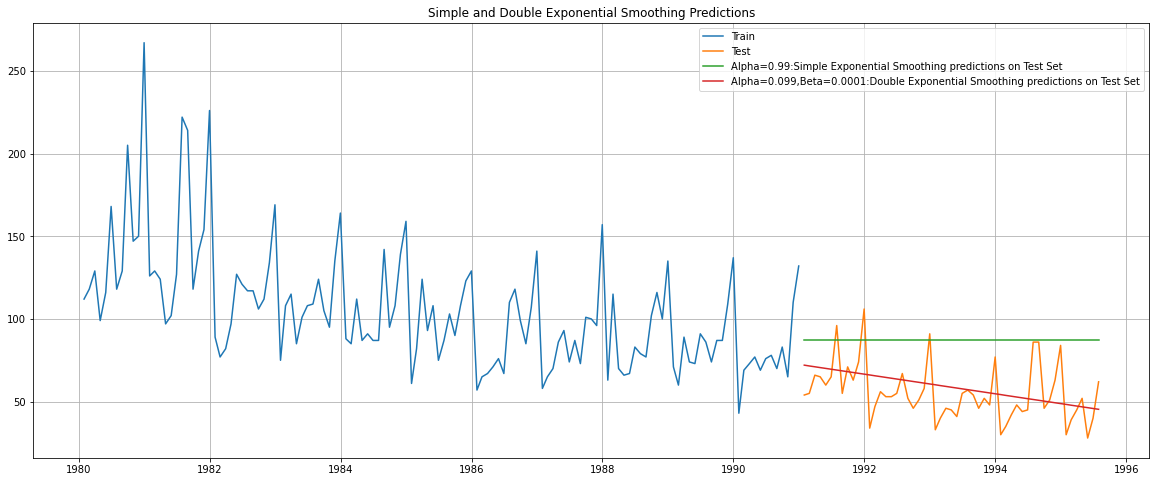

In [49]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [50]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 16.626378107082775


In [51]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",35.931341
"Alpha=1,Beta=0.0189:DES",16.626378


In [52]:
### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [53]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08836782954933799, 'smoothing_trend': 3.7265369347685534e-06, 'smoothing_seasonal': 0.0002605065424824379, 'damping_trend': nan, 'initial_level': 146.57689198128827, 'initial_trend': -0.5479332045914932, 'initial_seasons': array([-31.19657397, -18.85433488, -10.86210616, -21.51886836,
       -12.7199789 ,  -7.23811729,   2.66927264,   8.79928342,
         4.85478098,   2.96421129,  21.04754145,  63.34400663]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [54]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-31     42.625702
1991-02-28     54.420085
1991-03-31     61.864392
1991-04-30     50.659768
1991-05-31     58.910749
1991-06-30     63.844569
1991-07-31     73.204023
1991-08-31     78.785971
1991-09-30     74.293411
1991-10-31     71.854883
1991-11-30     89.390325
1991-12-31    131.140400
1992-01-31     36.050509
1992-02-29     47.844892
1992-03-31     55.289199
1992-04-30     44.084575
1992-05-31     52.335556
1992-06-30     57.269376
1992-07-31     66.628830
1992-08-31     72.210778
1992-09-30     67.718218
1992-10-31     65.279690
1992-11-30     82.815132
1992-12-31    124.565207
1993-01-31     29.475316
1993-02-28     41.269699
1993-03-31     48.714006
1993-04-30     37.509382
1993-05-31     45.760363
1993-06-30     50.694183
1993-07-31     60.053637
1993-08-31     65.635585
1993-09-30     61.143025
1993-10-31     58.704497
1993-11-30     76.239939
1993-12-31    117.990014
1994-01-31     22.900123
1994-02-28     34.694506
1994-03-31     42.138813
1994-04-30     30.934189


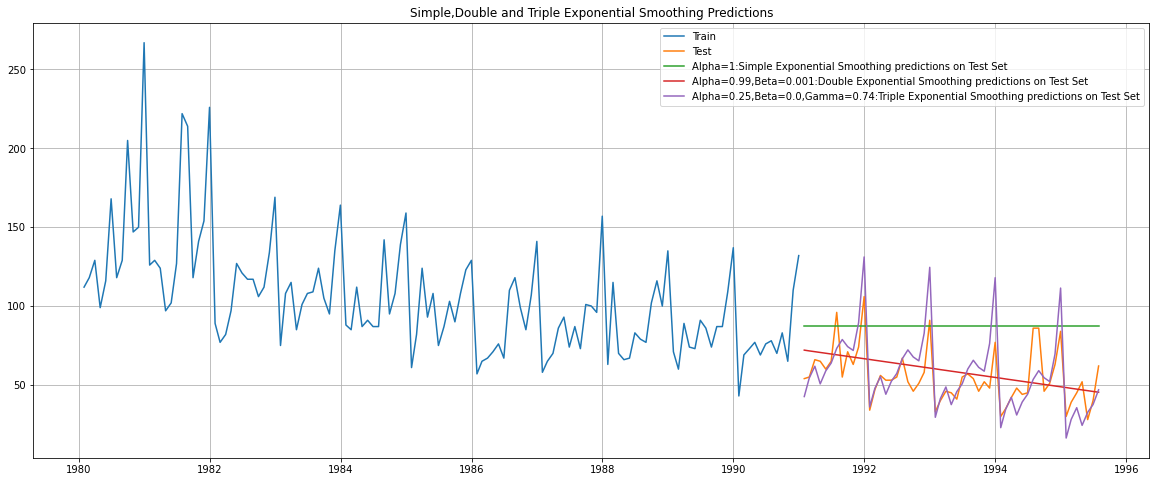

In [55]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [56]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 15.234229542091485


In [57]:

resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf


,Test RMSE
"Alpha=0.99,SES",35.931341
"Alpha=1,Beta=0.0189:DES",16.626378
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",15.234230


In [58]:
### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 

In [59]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07573891521656126, 'smoothing_trend': 0.04091528509191978, 'smoothing_seasonal': 5.567361492718731e-06, 'damping_trend': nan, 'initial_level': 135.1128497603501, 'initial_trend': -0.7885352874879394, 'initial_seasons': array([0.82989402, 0.94093356, 1.02875453, 0.89913664, 1.01143718,
       1.10067002, 1.21073563, 1.28970239, 1.21872571, 1.1941528 ,
       1.39232628, 1.91940552]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [60]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-31     56.054109
1991-02-28     63.339993
1991-03-31     69.017390
1991-04-30     60.116845
1991-05-31     67.394776
1991-06-30     73.089663
1991-07-31     80.122790
1991-08-31     85.054734
1991-09-30     80.096471
1991-10-31     78.209527
1991-11-30     90.871556
1991-12-31    124.834363
1992-01-31     53.785657
1992-02-29     60.768015
1992-03-31     66.205360
1992-04-30     57.659112
1992-05-31     64.630084
1992-06-30     70.081068
1992-07-31     76.813338
1992-08-31     81.529434
1992-09-30     76.765173
1992-10-31     74.945396
1992-11-30     87.065729
1992-12-31    119.587816
1993-01-31     51.517204
1993-02-28     58.196036
1993-03-31     63.393330
1993-04-30     55.201380
1993-05-31     61.865392
1993-06-30     67.072473
1993-07-31     73.503886
1993-08-31     78.004135
1993-09-30     73.433875
1993-10-31     71.681264
1993-11-30     83.259902
1993-12-31    114.341268
1994-01-31     49.248752
1994-02-28     55.624058
1994-03-31     60.581301
1994-04-30     52.743647


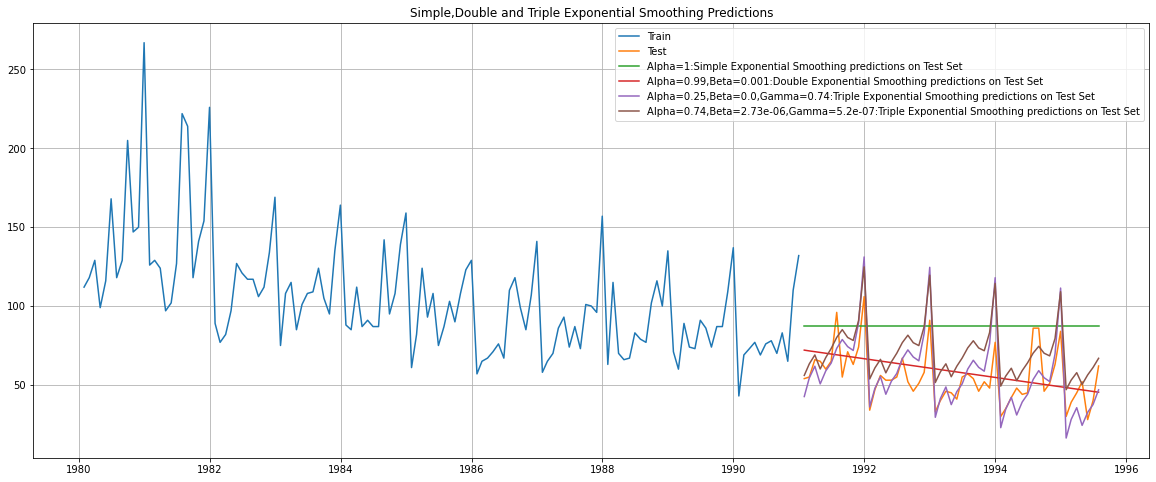

In [61]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [62]:
### Report model accuracy

In [63]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 18.919782790371887


In [64]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",35.931341
"Alpha=1,Beta=0.0189:DES",16.626378
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",15.234230
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",18.919783


In [65]:
### Building different models and comparing the accuracy metrics.
### Model 1: Linear Regression

In [66]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [67]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [68]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Rose  time
Time_Stamp            
1980-01-31   112     1
1980-02-29   118     2
1980-03-31   129     3
1980-04-30    99     4
1980-05-31   116     5 

Last few rows of Training Data 
             Rose  time
Time_Stamp            
1990-08-31    70   128
1990-09-30    83   129
1990-10-31    65   130
1990-11-30   110   131
1990-12-31   132   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31    54    43
1991-02-28    55    44
1991-03-31    66    45
1991-04-30    65    46
1991-05-31    60    47 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31    45    93
1995-04-30    52    94
1995-05-31    28    95
1995-06-30    40    96
1995-07-31    62    97 



In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lr = LinearRegression()

In [71]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

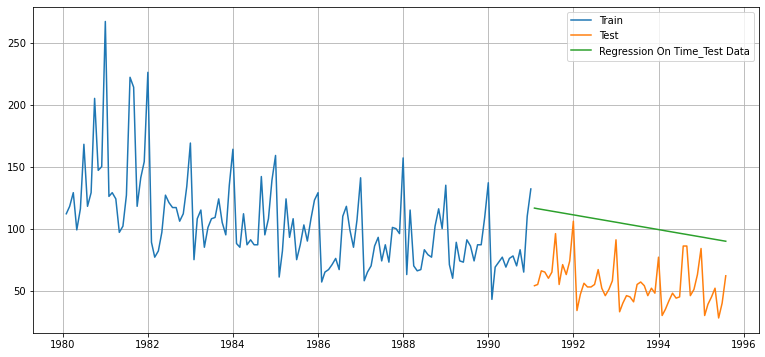

In [72]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [73]:
##### Defining the accuracy metrics.

In [74]:
from sklearn import metrics

In [75]:
# Model Evaluation

In [77]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 50.573


In [78]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,50.5729


In [79]:
### Model 2: Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡 

In [80]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [81]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132
1991-02-28    132
1991-03-31    132
1991-04-30    132
1991-05-31    132
Name: naive, dtype: int32

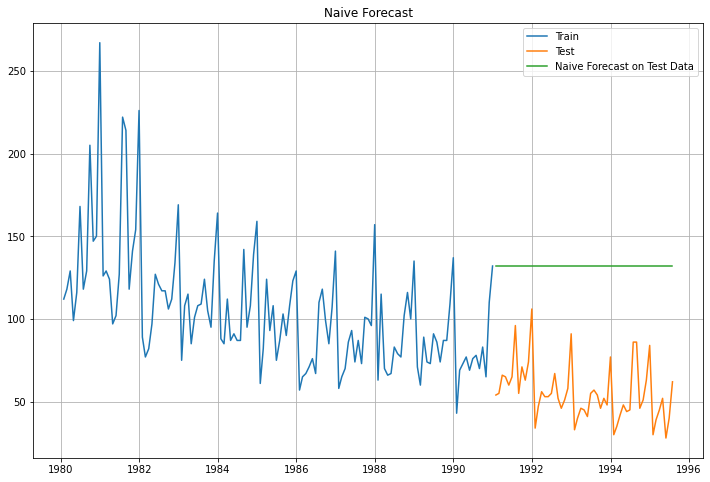

In [82]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [83]:
### Model Evaluation

In [84]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 78.485


In [85]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,50.57290
NaiveModel,78.48532


In [86]:
### Method 3: Simple Average

In [87]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [88]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54,104.939394
1991-02-28,55,104.939394
1991-03-31,66,104.939394
1991-04-30,65,104.939394
1991-05-31,60,104.939394


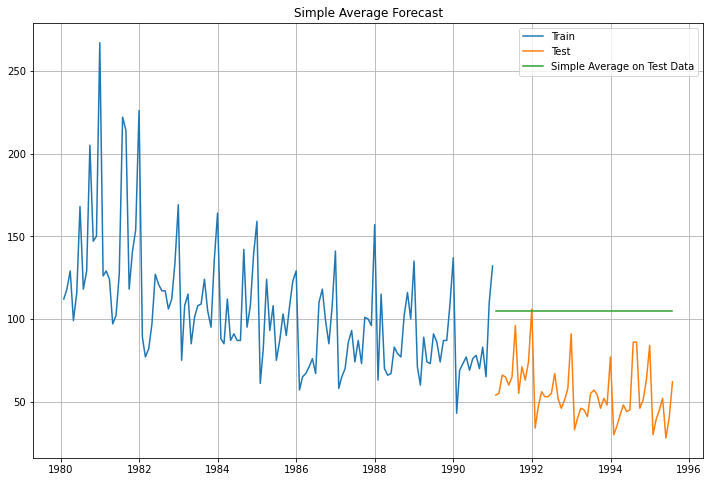

In [89]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [90]:
## Model Evaluation

In [91]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 52.370


In [92]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,50.572900
NaiveModel,78.485320
SimpleAverageModel,52.369847


## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

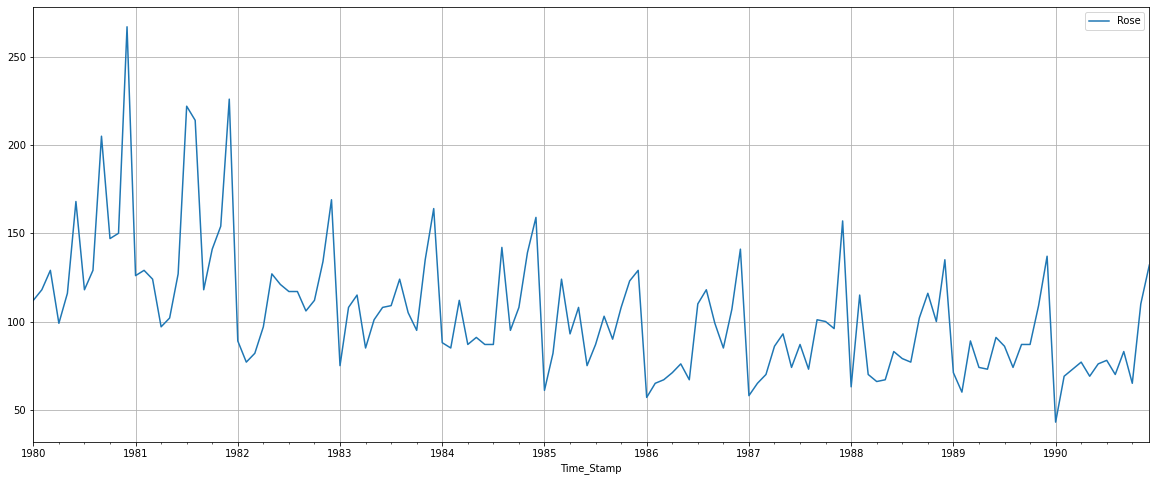

In [93]:
train.plot(grid=True);

In [94]:
from statsmodels.tsa.stattools import adfuller

In [95]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047127
Number of lags used 13


In [96]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.894831356782578e-08
Number of lags used 12


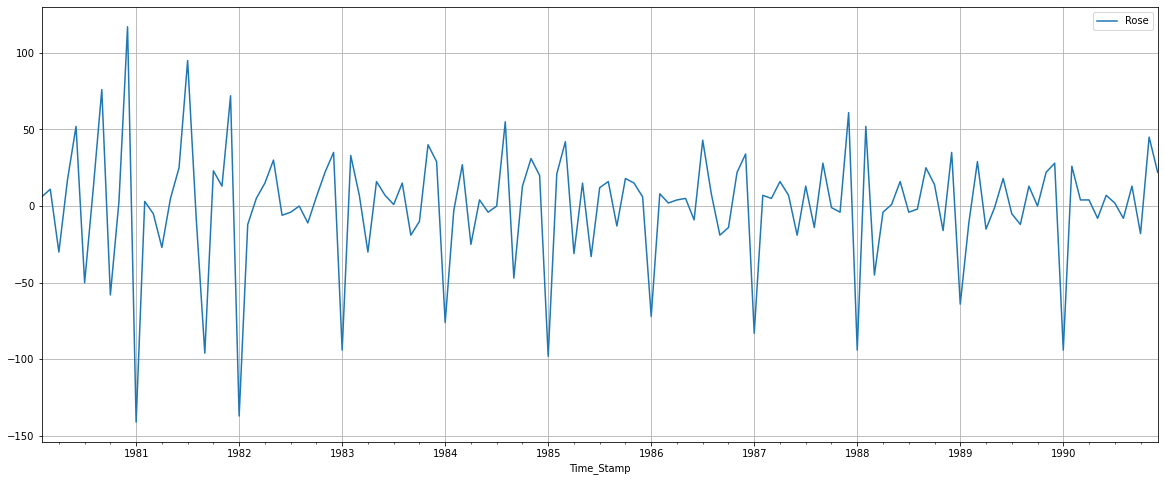

In [97]:
train.diff().dropna().plot(grid=True);

In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rose    132 non-null    int32
dtypes: int32(1)
memory usage: 1.5 KB


## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [99]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [100]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [101]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748315
ARIMA(0, 1, 2) - AIC:1279.67152885358
ARIMA(0, 1, 3) - AIC:1280.5453761734648
ARIMA(1, 1, 0) - AIC:1317.3503105381526
ARIMA(1, 1, 1) - AIC:1280.5742295380046
ARIMA(1, 1, 2) - AIC:1279.870723423191
ARIMA(1, 1, 3) - AIC:1281.8707223309939
ARIMA(2, 1, 0) - AIC:1298.6110341604908
ARIMA(2, 1, 1) - AIC:1281.5078621868417
ARIMA(2, 1, 2) - AIC:1281.870722226478


C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1274.6950535191945
ARIMA(3, 1, 0) - AIC:1297.4810917271702
ARIMA(3, 1, 1) - AIC:1282.4192776271962
ARIMA(3, 1, 2) - AIC:1283.720740597714
ARIMA(3, 1, 3) - AIC:1278.6583721932645


C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [102]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
11,"(2, 1, 3)",1274.695054
15,"(3, 1, 3)",1278.658372
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376


In [111]:
auto_ARIMA = ARIMA(train, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 04 Apr 2021   AIC                           1274.695
Time:                        18:08:22   BIC                           1291.946
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6780      0.084    -20.015      0.000      -1.842      -1.514
ar.L2         -0.7288      0.084     -8.693      0.000      -0.893      -0.564
ma.L1          1.0448      0.652      1.602      0.1

C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [104]:
## Diagnostics plot

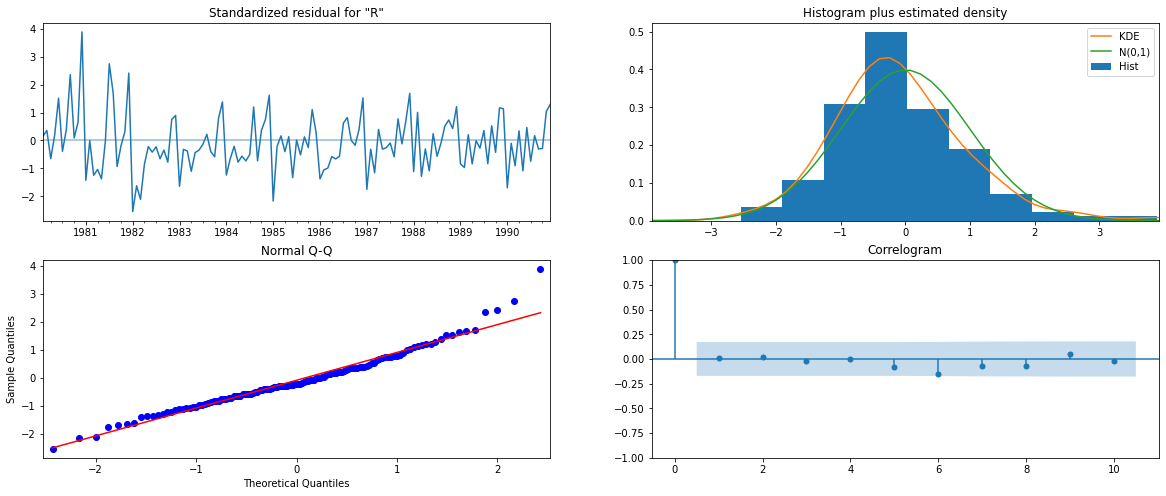

In [112]:
results_auto_ARIMA.plot_diagnostics();

In [106]:
### Predict on the Test Set using this model and evaluate the model.

In [113]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [114]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [115]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 35.9567538138475 
MAPE: 72.57088908808394


In [116]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,3)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,3)",35.956754,72.570889


### SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [117]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

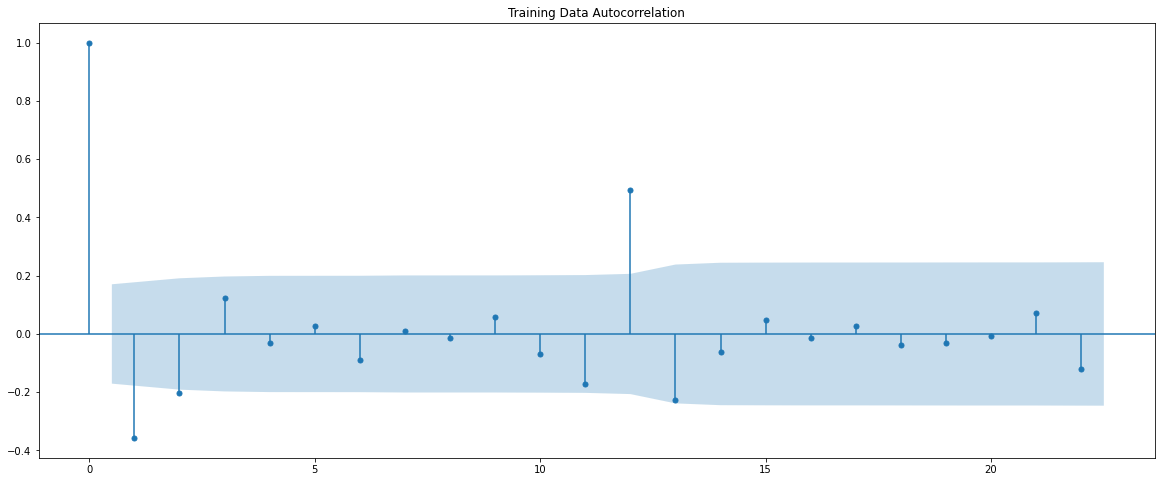

In [118]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

In [119]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [120]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [121]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113859
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827295
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1081.2713830625162
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087983
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149068
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266722296
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1058.9861743124368
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515197
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426183172
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1058.8048206422313
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1072.5465834695271
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1061.3687765139862
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1058.0425052861517
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1058.891709538993
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029543
SARIMA(0, 1, 1)x(0, 0, 2, 6) 

SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1068.4781627386224
SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1051.6734607521953
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:965.1763959209925
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:974.1258778649101
SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:975.806838570225
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:967.6521359980935
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:967.1740897731368
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:1253.9102116146696
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1185.7691931296329
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1082.5581033340256
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1005.4894643084963
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:1200.421749251091
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1150.7283254465142
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1063.1103217166178
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:996.8724008742313
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1073.6961457856576
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1070.0771798958071
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1045.220403627139
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:96

In [122]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 0, 3, 6)",951.744297
59,"(0, 1, 3)","(2, 0, 3, 6)",952.073632
251,"(3, 1, 3)","(2, 0, 3, 6)",952.582101
191,"(2, 1, 3)","(3, 0, 3, 6)",953.205622
123,"(1, 1, 3)","(2, 0, 3, 6)",953.684951


In [124]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2, 1, 3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -464.603
Date:                           Sun, 04 Apr 2021   AIC                            953.206
Time:                                   18:16:57   BIC                            985.502
Sample:                               01-31-1980   HQIC                           966.303
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0859      0.172     -0.501      0.617      -0.422       0.250
ar.L2         -0.4835      0.174     -2.772

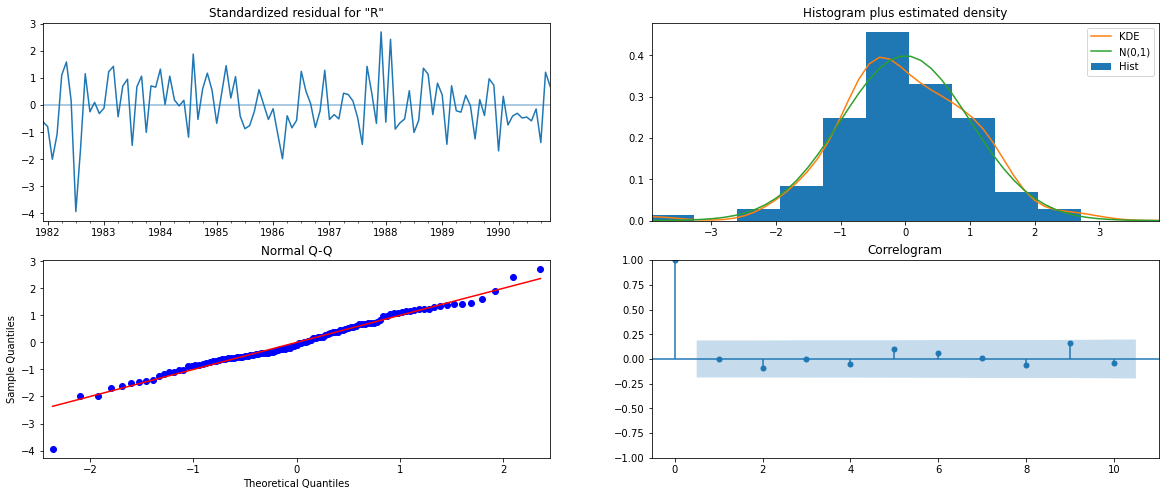

In [125]:
results_auto_SARIMA.plot_diagnostics();

In [126]:
## Predict on the Test Set using this model and evaluate the model.

In [127]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [128]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,68.229914,16.450124,35.988264,100.471564
1991-02-28,65.420479,16.881580,32.333190,98.507769
1991-03-31,77.852497,16.931520,44.667327,111.037667
1991-04-30,77.420750,17.006900,44.087839,110.753660
1991-05-31,79.642429,17.008523,46.306337,112.978520


In [129]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 28.04620951800634 
MAPE: 56.22789675979427


In [130]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(1,1,3)(3,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,3)",35.956754,72.570889
"SARIMA(1,1,3)(3,0,3,6)",28.046210,56.227897


## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

In [131]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

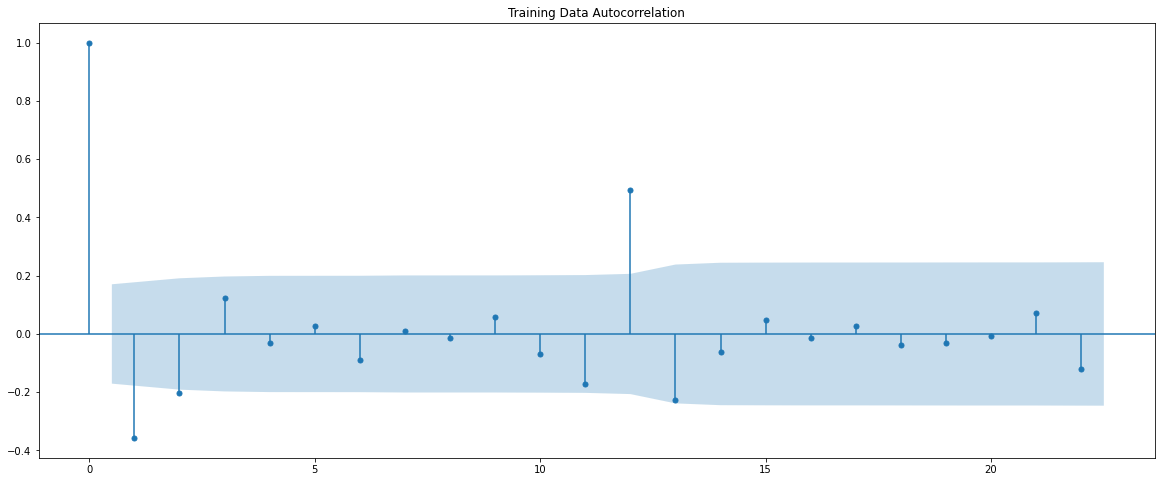

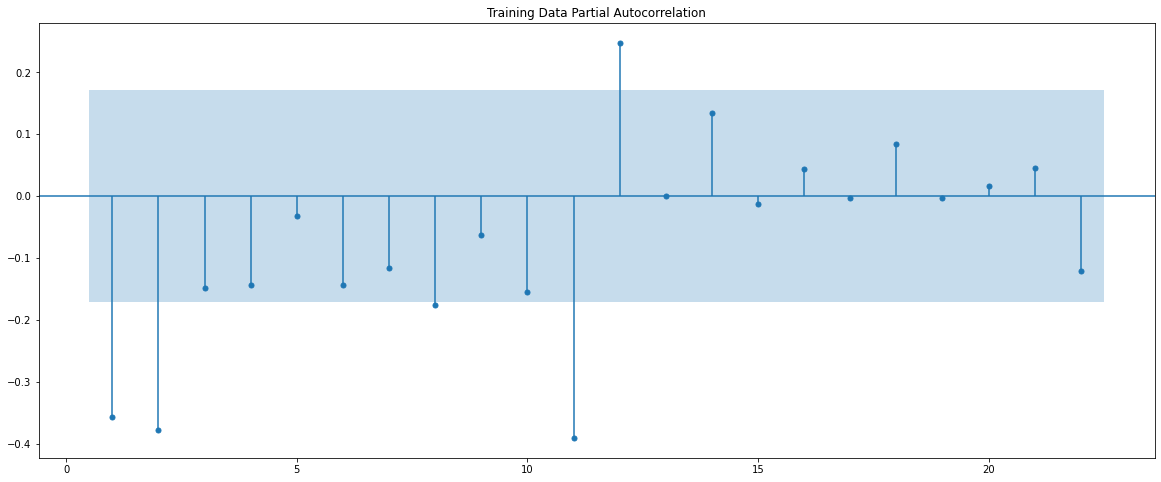

In [132]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

In [134]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(3,1,3),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:               SARIMAX(3, 1, 3)   Log Likelihood                -614.869
Date:                Sun, 04 Apr 2021   AIC                           1243.739
Time:                        18:27:55   BIC                           1263.648
Sample:                    01-31-1980   HQIC                          1251.828
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5775      0.087    -18.075      0.000      -1.749      -1.406
ar.L2         -0.6535      0.143     -4.580      0.000      -0.933      -0.374
ar.L3          0.1253      0.091      1.379      0.1

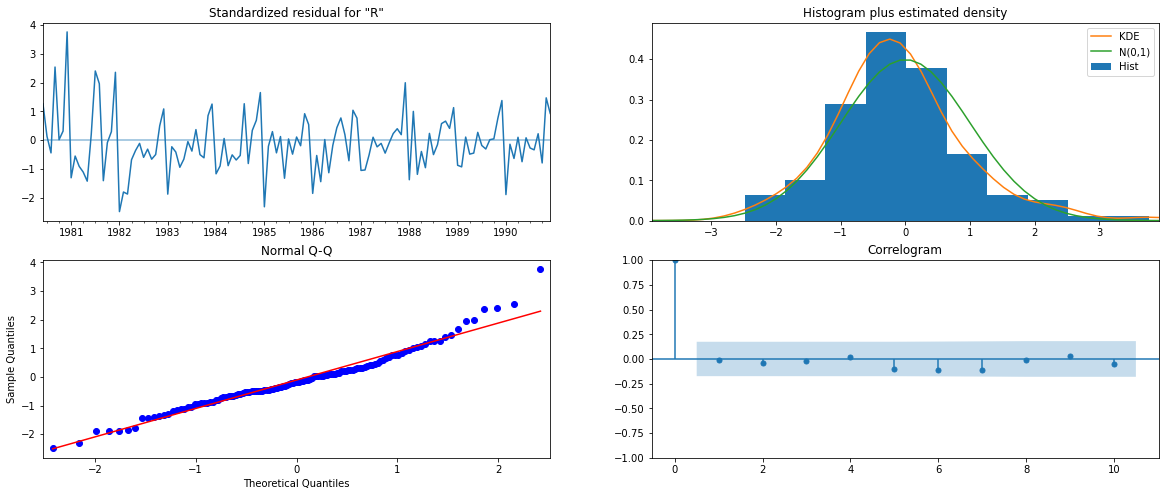

In [135]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [136]:
## Predict on the Test Set using this model and evaluate the model.

In [137]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [138]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 35.583280410599336 
MAPE: 71.53936830893622


In [139]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(2,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,3)",35.956754,72.570889
"SARIMA(1,1,3)(3,0,3,6)",28.046210,56.227897
"SARIMA(3,1,3)(2,0,3,6)",35.583280,71.539368


### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.


In [140]:
full_data_model = sm.tsa.statespace.SARIMAX(data['Rose'],
                                order=(1,1,3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  187
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -683.647
Date:                           Sun, 04 Apr 2021   AIC                           1389.295
Time:                                   18:37:36   BIC                           1423.393
Sample:                               01-31-1980   HQIC                          1403.138
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1157      0.375     -0.309      0.757      -0.850       0.619
ma.L1         -0.5994      0.378     -1.586

In [141]:

### Evaluate the model on the whole data and predict 12 months into the future 

In [142]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [143]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,63.610997,15.295735,33.631906,93.590087
1995-09-30,48.199856,15.904281,17.028038,79.371674
1995-10-31,53.154768,15.937421,21.917997,84.391539
1995-11-30,57.869559,15.988443,26.532786,89.206332
1995-12-31,72.299119,16.037164,40.866856,103.731382


In [144]:
rmse = mean_squared_error(data['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 28.905648841360122


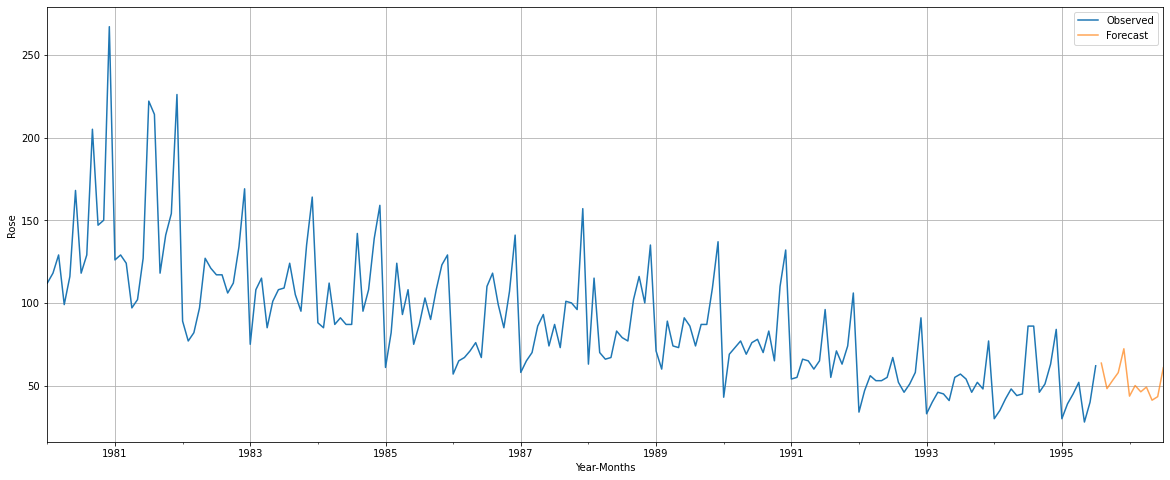

In [145]:
axis = data['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid();

In [146]:
resultsDf

,RMSE,MAPE
"ARIMA(2,1,3)",35.956754,72.570889
"SARIMA(1,1,3)(3,0,3,6)",28.046210,56.227897
"SARIMA(3,1,3)(2,0,3,6)",35.583280,71.539368
